In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install mlflow

  Using cached mlflow-1.30.0-py3-none-any.whl (17.0 MB)
  Using cached databricks_cli-0.17.3-py3-none-any.whl
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached Flask-2.2.2-py3-none-any.whl (101 kB)
  Using cached alembic-1.8.1-py3-none-any.whl (209 kB)
  Using cached prometheus_flask_exporter-0.21.0-py3-none-any.whl (18 kB)
  Using cached gunicorn-20.1.0-py3-none-any.whl (79 kB)
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)


In [3]:
#Local files
from params import *
import functions as fun

#Google Cloud
from google.cloud import storage

#TensorFLow
from tensorflow.keras.callbacks import EarlyStopping

#Sklearn
from sklearn.neighbors import NearestNeighbors #Nearest neighbors

#MlFlow

import mlflow

#Extras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
from subprocess import Popen, PIPE


2022-12-05 09:40:47.523367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 09:40:50.592927: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-05 09:40:56.352547: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-05 09:40:56.352910: W tensorfl

In [4]:
mlflow.set_tracking_uri("https://mlflow.lewagon.ai")

model_uri = f"models:/{MLFLOW_MODEL_AUTOENCODER}/Production"

model = mlflow.keras.load_model(model_uri=model_uri)

2022-12-05 09:42:16.063274: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-05 09:42:16.076356: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-05 09:42:16.076445: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (62081fbfe000): /proc/driver/nvidia/version does not exist
2022-12-05 09:42:16.078074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable 

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 50)                196362    
                                                                 
 sequential_1 (Sequential)   (None, 100, 100, 3)       255363    
                                                                 
Total params: 451,725
Trainable params: 451,725
Non-trainable params: 0
_________________________________________________________________


In [8]:
mlflow.set_tracking_uri("https://mlflow.lewagon.ai")

model_uri = f"models:/{MLFLOW_MODEL_NAME_NN}/Production"

model = mlflow.sklearn.load_model(model_uri=model_uri)

In [9]:
model.summary()

AttributeError: 'NearestNeighbors' object has no attribute 'summary'

## Get images from bucket and process

In [ ]:
data_set = fun.load_data(BUCKET_NAME)

2022-12-02 16:18:53.885090: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-02 16:18:53.885143: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-02 16:18:53.885174: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (895e8d4e9297): /proc/driver/nvidia/version does not exist
2022-12-02 16:18:53.885618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable 

## Image Iterator

In [ ]:
np_ds = data_set.as_numpy_iterator()

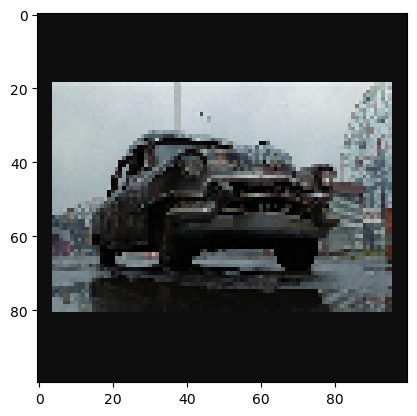

In [ ]:
plt.imshow(np_ds.__next__()[0][0]);

## Encoding

In [ ]:
encoder = fun.build_encoder(LATENT_DIMENSION)
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 99, 99, 8)         104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 16)        528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 32)        2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0

## Decoders

In [ ]:
decoder = fun.build_decoder(LATENT_DIMENSION)
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 5000)              255000    
                                                                 
 reshape (Reshape)           (None, 25, 25, 8)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 50, 50, 8)        264       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 100, 100, 3)      99        
 ranspose)                                                       
                                                                 
Total params: 255,363
Trainable params: 255,363
Non-trainable params: 0
_________________________________________________________________


## Autoencoder

In [ ]:
autoencoder = fun.build_autoencoder(encoder, decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 50)                196362    
                                                                 
 sequential_1 (Sequential)   (None, 100, 100, 3)       255363    
                                                                 
Total params: 451,725
Trainable params: 451,725
Non-trainable params: 0
_________________________________________________________________


## Compile

In [ ]:
fun.compile_autoencoder(autoencoder)

## Train the Model

In [ ]:
es = EarlyStopping(patience=PATIENCE, restore_best_weights= True)

autoencoder.fit(data_set,
                epochs = EPOCHS)

Epoch 1/20
822/822 [==============================] - 178s 214ms/step - loss: 0.0148
Epoch 2/20
822/822 [==============================] - 20s 25ms/step - loss: 0.0081
Epoch 3/20
822/822 [==============================] - 20s 25ms/step - loss: 0.0074
Epoch 4/20
822/822 [==============================] - 20s 25ms/step - loss: 0.0071
Epoch 5/20
822/822 [==============================] - 21s 25ms/step - loss: 0.0063
Epoch 6/20
822/822 [==============================] - 20s 25ms/step - loss: 0.0061
Epoch 7/20
822/822 [==============================] - 20s 25ms/step - loss: 0.0060
Epoch 8/20
822/822 [==============================] - 21s 25ms/step - loss: 0.0059
Epoch 9/20
822/822 [==============================] - 20s 25ms/step - loss: 0.0059
Epoch 10/20
822/822 [==============================] - 20s 25ms/step - loss: 0.0058
Epoch 11/20
822/822 [==============================] - 21s 25ms/step - loss: 0.0058
Epoch 12/20
822/822 [==============================] - 20s 25ms/step - loss: 0.0058

In [ ]:
import tensorflow as tf

In [ ]:
new_model = tf.keras.models.load_model('models/model_loss_0_0056')

In [ ]:
mlflow_tracking_uri = MLFLOW_TRACKING_URI
mlflow_experiment_autoencoder = MLFLOW_EXPERIMENT_AUTOENCODER
mlflow_model_name_autoencoder = MLFLOW_MODEL_AUTOENCODER


mlflow.set_tracking_uri(mlflow_tracking_uri)
mlflow.set_experiment(experiment_name=mlflow_experiment_autoencoder)

with mlflow.start_run():
    
    mlflow.keras.log_model(keras_model=new_model,
                        artifact_path="model",
                        keras_module="tensorflow.keras",
                        registered_model_name=mlflow_model_name_autoencoder)


INFO:tensorflow:Assets written to: /tmp/tmpfsju08qw/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpfsju08qw/model/data/model/assets
Registered model 'soundtrack_selector_autoencoder' already exists. Creating a new version of this model...
2022/12/02 16:21:05 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: soundtrack_selector_autoencoder, version 2
Created version '2' of model 'soundtrack_selector_autoencoder'.


## Save Model

In [ ]:
loss = '0_0056'
name_model = f'model_loss_{loss}' 
autoencoder.save(f'models/{name_model}')

INFO:tensorflow:Assets written to: models/model_loss_0_0056/assets


INFO:tensorflow:Assets written to: models/model_loss_0_0056/assets


## Encode to latent space

In [ ]:
prediction = encoder.predict(data_set)

822/822 [==============================] - 160s 194ms/step


In [ ]:
prediction

array([[-1.9499330e-02,  1.9351235e-02, -4.5582782e-03, ...,
         4.2120893e-02,  4.3597285e-02,  7.6627359e-05],
       [ 3.1158740e-02,  5.9746210e-03, -1.6139381e-02, ...,
         6.3323458e-03,  4.5793381e-02,  2.5961628e-02],
       [ 1.2036078e-02,  8.2600471e-03,  1.7717848e-02, ...,
         2.0490151e-02,  1.2115715e-02,  2.3016715e-02],
       ...,
       [ 3.3704869e-02,  5.6638950e-03,  1.7695952e-02, ...,
         4.0180579e-02,  2.2759655e-02,  1.1556832e-02],
       [-9.0352714e-04,  4.9886904e-03, -7.7067395e-03, ...,
         1.0740945e-02,  1.1449766e-02,  1.4306706e-02],
       [-1.8664444e-02,  6.3121039e-03,  1.6967965e-02, ...,
         6.4187437e-02,  5.5428363e-02,  3.0378250e-03]], dtype=float32)

## Nearest Neighbors

In [ ]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(prediction)

In [ ]:
mlflow_tracking_uri = MLFLOW_TRACKING_URI
mlflow_experiment_nn = MLFLOW_EXPERIMENT_NN
mlflow_model_name_NN = MLFLOW_MODEL_NAME_NN

mlflow.set_tracking_uri(mlflow_tracking_uri)
mlflow.set_experiment(experiment_name=mlflow_experiment_nn)

with mlflow.start_run():
    
    mlflow.sklearn.log_model(sk_model=nbrs,
                        artifact_path="model",
                        # sklearn_module="sklearn.neighbors",
                        registered_model_name=mlflow_model_name_NN)
    

2022/12/02 16:40:48 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'soundtrack_selector_nn' already exists. Creating a new version of this model...
2022/12/02 16:40:54 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: soundtrack_selector_nn, version 2
Created version '2' of model 'soundtrack_selector_nn'.


In [ ]:
loss = 'nn_0_0056'
name_model = f'model_loss_{loss}' 
nbrs.save(f'models/{name_model}')

AttributeError: 'NearestNeighbors' object has no attribute 'save'

In [ ]:
def find_info_in_data(indices):
    info = []
    image_names = []
    titles = []
    years = []
    genres = []
    for i in range(len(indices[0])):
        index = indices[0][i]
        name = df._get_value(index, "Image_Name")
        nindex = data.index[data['Image_name'] == name[10:]]
        title = (data.loc[nindex, 'Title'].item()).capitalize()
        year = data.loc[nindex, 'Year'].item()
        genre = data.loc[nindex, 'Genre'].item()
        info.append([title, year, genre])
        image_names.append(name)
    return info, image_names
    

In [ ]:
def get_image(image_names):
    client =  storage.Client()
    bucket = client.get_bucket('image-storage-stills')
    images = []
    for name in image_names:
        print(name)
        blob = bucket.get_blob(name)
        print(blob)
        image = blob.download_as_string()
        images.append(image)
    return images